In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA\ML Practical/Assignments/classification/fruitdata.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [3]:
df[["fruit_label","mass","width","height","color_score"]].corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [ ]:
for i in df.columns[[0,2,3,4,5]]:
    grp = df.groupby("fruit_name")[i]
    print("for column", i , "P- value is",f_oneway(*grp.apply(list))[1])

In [4]:
X=df[["width","height","color_score"]].values
print(X.shape)
y= df["fruit_label"].values
y.shape

(59, 3)


(59,)

In [12]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47, 3) (12, 3) (47,) (12,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 5)
rfmodel.fit(X_train,y_train).score(X_test,y_test)

0.8333333333333334

In [14]:
rfmodel.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1981768366),
 DecisionTreeClassifier(max_features='sqrt', random_state=1050388271),
 DecisionTreeClassifier(max_features='sqrt', random_state=1791568618),
 DecisionTreeClassifier(max_features='sqrt', random_state=823190024),
 DecisionTreeClassifier(max_features='sqrt', random_state=851657206)]

In [15]:
from sklearn import tree

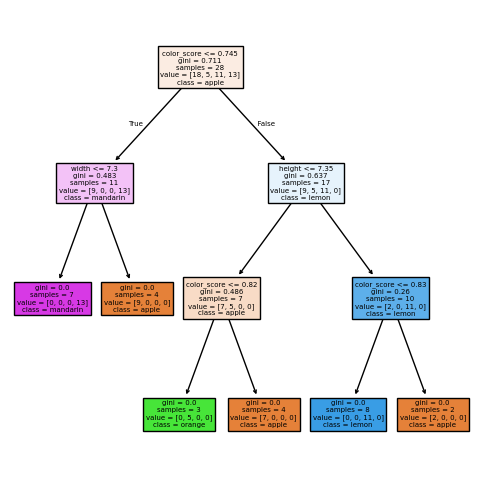

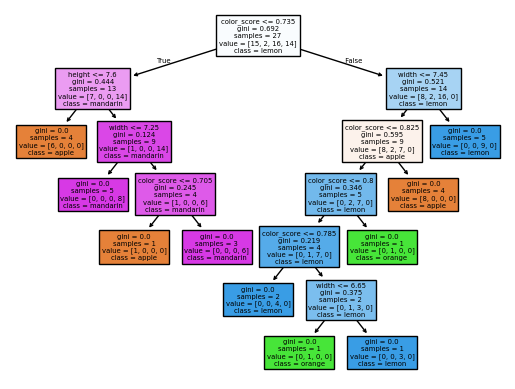

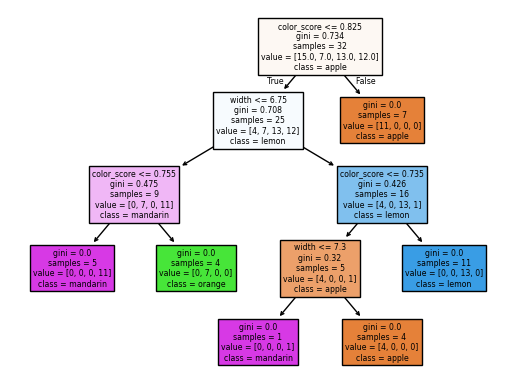

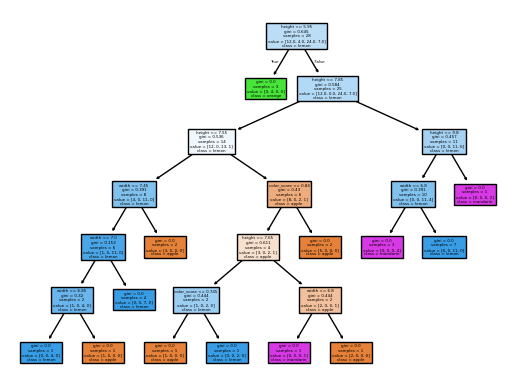

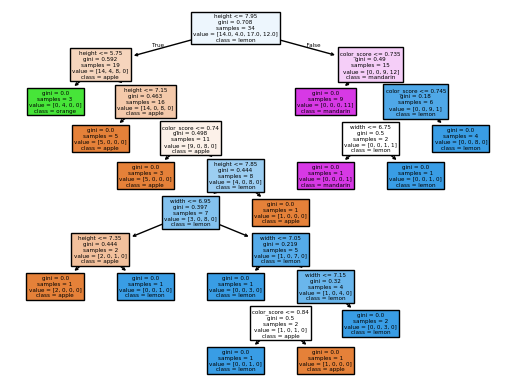

In [19]:
from sklearn import tree
plt.figure(figsize=(6,6))
fn =["width","height","color_score"]
cn =['apple','orange','lemon','mandarin']
for i in range(5):
    tree.plot_tree(rfmodel.estimators_[i],filled= True, feature_names = fn , class_names=cn)
    plt.show()

In [24]:
params = {'criterion':['gini','entropy'],
            'n_estimators':[5,10,50,100],
            'max_depth':[2,4,8]}
print(params)

{'criterion': ['gini', 'entropy'], 'n_estimators': [5, 10, 50, 100], 'max_depth': [2, 4, 8]}


In [25]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(rfmodel, params)
grid_model.fit(X_train,y_train)
grid_model.best_params_

C:\Users\vaishnavi\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 10}

In [28]:
finalmodel = RandomForestClassifier(n_estimators=50,max_depth=2)
finalmodel.fit(X_train,y_train).score(X_test,y_test)

0.9166666666666666

In [26]:
from sklearn.model_selection import cross_val_score

In [29]:
accuracies= cross_val_score(finalmodel,X_train,y_train,cv=5)
print("Average Accuracy =",np.mean(accuracies))

C:\Users\vaishnavi\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Average Accuracy = 0.9555555555555555
